In [7]:
import sys

sys.path.append("../")

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def xy_points_to_slope_midpoint(xy_points):
    """
    Given two points, return the slope and midpoint of the line

    Args:
    xy_points: list of two points, each point is a list of two elements
    Points are in the form of [x, y], where x and y are normalized to [0, 1]

    Returns:
    slope: Slope of the line
    midpoint : Midpoint is in the form of [x,y], and is also normalized to [0, 1]
    """

    x1, y1, x2, y2 = xy_points[0][0], xy_points[0][1], xy_points[1][0], xy_points[1][1]
    slope = (y2 - y1) / (x2 - x1)

    midpoint_x = 0.5
    midpoint_y = slope * (0.5 - x1) + y1

    midpoint = [midpoint_x, midpoint_y]

    return slope, midpoint

def calculate_horizon_error(annotated_horizon, proposed_horizon):
    """
    Calculate the error between the annotated horizon and the proposed horizon

    Args:
    annotated_horizon: list of two points, each point is a list of two elements
    Points are in the form of [x, y], where x and y are normalized to [0, 1]
    proposed_horizon: list of two points, each point is a list of two elements
    Points are in the form of [x, y], where x and y are normalized to [0, 1]

    Returns:
    slope_error: Error in the slope of the lines
    midpoint_error: Error in the midpoint_y of the lines
    """

    slope_annotated, midpoint_annotated = xy_points_to_slope_midpoint(annotated_horizon)
    slope_proposed, midpoint_proposed = xy_points_to_slope_midpoint(proposed_horizon)

    slope_error = abs(slope_annotated - slope_proposed)
    midpoint_error = abs(midpoint_annotated[1] - midpoint_proposed[1])

    return slope_error, midpoint_error

def calculate_horizon_error_across_sequence(slope_error_list, midpoint_error_list, slope_error_jump_threshold, midpoint_error_jump_threshold):
    """
    Calculate the error statistics across a sequence of frames

    Args:
    slope_error_list: List of errors in the slope of the lines
    midpoint_error_list: List of errors in the midpoint_y of the lines

    Returns:
    average_slope_error: Average error in the slope of the lines
    average_midpoint_error: Average error in the midpoint_y of the lines
    """

    # Calculate the average and standard deviation of the errors
    average_slope_error = np.mean(slope_error_list)
    average_midpoint_error = np.mean(midpoint_error_list)

    stddev_slope_error = np.std(slope_error_list)
    stddev_midpoint_error = np.std(midpoint_error_list)

    # Calculate the maximum errors
    max_slope_error = np.max(slope_error_list)
    max_midpoint_error = np.max(midpoint_error_list)

    # Calculate the differences between errors in successive frames
    diff_slope_error = np.abs(np.diff(slope_error_list))
    diff_midpoint_error = np.abs(np.diff(midpoint_error_list))

    # Calculate the number of jumps in the errors
    num_slope_error_jumps = np.sum(diff_slope_error > slope_error_jump_threshold)
    num_midpoint_error_jumps = np.sum(diff_midpoint_error > midpoint_error_jump_threshold)

    # Create a dictionary to store the results
    sequence_results = {
        'average_slope_error': average_slope_error,
        'average_midpoint_error': average_midpoint_error,
        'stddev_slope_error': stddev_slope_error,
        'stddev_midpoint_error': stddev_midpoint_error,
        'max_slope_error': max_slope_error,
        'max_midpoint_error': max_midpoint_error,
        'num_slope_error_jumps': num_slope_error_jumps,
        'num_midpoint_error_jumps': num_midpoint_error_jumps
    }

    return sequence_results

def slope_to_roll(slope):
    """
    Convert the slope of the horizon to roll

    Args:
    slope: Slope of the horizon

    Returns:
    roll: Roll in degrees
    """
    roll = np.arctan(slope) * 180 / np.pi
    return roll

def roll_to_slope(roll):
    """
    Convert the roll of the horizon to slope

    Args:
    roll: Roll of the horizon in degrees

    Returns:
    slope: Slope of the horizon
    """
    slope = np.tan(roll * np.pi / 180)
    return slope

def midpoint_to_pitch(midpoint, vertical_fov_degrees):
    """
    Convert the midpoint of the horizon to pitch

    Args:
    midpoint: Midpoint of the horizon
    vertical_fov_degrees: Vertical field of view of the camera in degrees

    Returns:
    pitch: Pitch in degrees
    """
    pitch = midpoint * vertical_fov_degrees
    return pitch

def pitch_to_midpoint(pitch, vertical_fov_degrees):
    """
    Convert the pitch of the horizon to midpoint

    Args:
    pitch: Pitch of the horizon in degrees
    vertical_fov_degrees: Vertical field of view of the camera in degrees

    Returns:
    midpoint: Midpoint of the horizon
    """
    midpoint = pitch / vertical_fov_degrees
    return midpoint


Experiment only : Just an example usage of the functions above to obtain per-frame horizon error (slope_error, midpoint_error) as well as per-sequence horizon errors (Dictionary containing different statistics)

In [10]:
# Set up some fake data for testing

annotated_horizon_1 = [[0.1, 0.3], [0.99, 0.4]]
proposed_horizon_1 = [[0.1, 0.31], [0.99, 0.4]]

annotated_horizon_2 = [[0.1, 0.3], [0.99, 0.4]]
proposed_horizon_2 = [[0.1, 0.33], [0.99, 0.43]]

annotated_horizon_3 = [[0.1, 0.3], [0.99, 0.4]]
proposed_horizon_3 = [[0.1, 0.35], [0.99, 0.34]]

annotated_horizon_list = [annotated_horizon_1, annotated_horizon_2, annotated_horizon_3]
proposed_horizon_list = [proposed_horizon_1, proposed_horizon_2, proposed_horizon_3]

# Set error jump thresholds (in degrees)
roll_thresh = 0.5
pitch_thresh = 1

# Set the vertical field of view of the camera in degrees
vertical_fov_degrees = 25.6

# Convert the thresholds to slope and midpoint
slope_thresh = roll_to_slope(roll_thresh)
midpoint_thresh = pitch_to_midpoint(pitch_thresh, vertical_fov_degrees)

slope_error_list = []
midpoint_error_list = []

for annotated_horizon, proposed_horizon in zip(annotated_horizon_list, proposed_horizon_list):
    slope_error, midpoint_error = calculate_horizon_error(annotated_horizon, proposed_horizon)
    slope_error_list.append(slope_error)
    midpoint_error_list.append(midpoint_error)


#print("Slope error list: ", slope_error_list)
#print("Midpoint error list: ", midpoint_error_list)

#print("Slope threshold: ", slope_thresh)
#print("Midpoint threshold: ", midpoint_thresh)

calculate_horizon_error_across_sequence(slope_error_list, midpoint_error_list, slope_thresh, midpoint_thresh)


{'average_slope_error': 0.04494382022471912,
 'average_midpoint_error': 0.01202247191011239,
 'stddev_slope_error': 0.055803986613300875,
 'stddev_midpoint_error': 0.012871259373001273,
 'max_slope_error': 0.12359550561797751,
 'max_midpoint_error': 0.030000000000000027,
 'num_slope_error_jumps': 2,
 'num_midpoint_error_jumps': 0}

Experimentation only: Just testing the conversion functions

In [11]:
i = 0
while i < 100000:
    # Generate random roll and pitch
    roll = np.random.uniform(-90, 90)
    pitch = np.random.uniform(-90, 90)

    # Convert roll and pitch to slope and midpoint
    slope = roll_to_slope(roll)
    midpoint = pitch_to_midpoint(pitch, 25.6)

    # Convert slope and midpoint to roll and pitch
    roll_recovered = slope_to_roll(slope)
    pitch_recovered = midpoint_to_pitch(midpoint, 25.6)

    #print("Roll: ", roll, "Pitch: ", pitch)
    #print("Slope: ", slope, "Midpoint: ", midpoint)
    #print("Recovered roll: ", roll_recovered, "Recovered pitch: ", pitch_recovered)

    if abs(roll - roll_recovered) > 1e-6:
        print("Roll conversion failed")
    if abs(pitch - pitch_recovered) > 1e-6:
        print("Pitch conversion failed")

    i += 1


Experiment only : Visualising what slope and midpoint looks like

Annotated slope:  0.11235955056179779 Annotated midpoint:  [0.5, 0.3449438202247191]
Proposed slope:  -0.22471910112359553 Proposed midpoint:  [0.5, 0.4101123595505618]


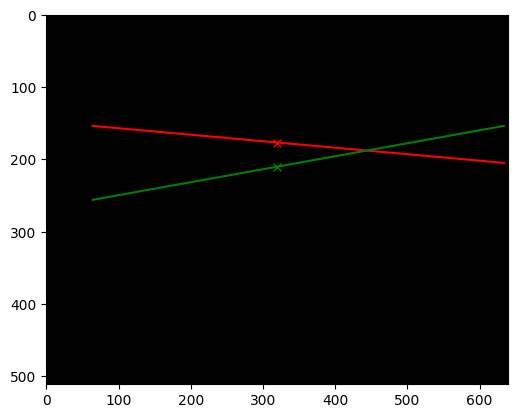

In [12]:
annotated_horizon = [[0.1, 0.3], [0.99, 0.4]]
proposed_horizon = [[0.1, 0.5], [0.99, 0.3]]

# Create and empty image of size 640 * 512
img = np.zeros((512, 640, 3), dtype=np.uint8)

# Plot the image
plt.imshow(img)

# Plot the annotated horizon
plt.plot([annotated_horizon[0][0] * 640, annotated_horizon[1][0] * 640], [annotated_horizon[0][1] * 512, annotated_horizon[1][1] * 512], 'r')

# Plot the proposed horizon
plt.plot([proposed_horizon[0][0] * 640, proposed_horizon[1][0] * 640], [proposed_horizon[0][1] * 512, proposed_horizon[1][1] * 512], 'g')

annotated_slope, annotated_midpoint = xy_points_to_slope_midpoint(annotated_horizon)
proposed_slope, proposed_midpoint = xy_points_to_slope_midpoint(proposed_horizon)
print("Annotated slope: ", annotated_slope, "Annotated midpoint: ", annotated_midpoint)
print("Proposed slope: ", proposed_slope, "Proposed midpoint: ", proposed_midpoint)

# Plot the midpoint of the annotated horizon
plt.plot(annotated_midpoint[0] * 640, annotated_midpoint[1] * 512, 'rx')

# Plot the midpoint of the proposed horizon
plt.plot(proposed_midpoint[0] * 640, proposed_midpoint[1] * 512, 'gx')



plt.show()

#### Seametrics usage

In [8]:
import os
from pathlib import Path

config_path = Path.home() / ".fiftyone" / "config.global_mongodb.json"
os.environ["FIFTYONE_CONFIG_PATH"] = str(config_path)
import fiftyone as fo
from fiftyone import ViewField as F

In [9]:
from seametrics.horizon.horizon import HorizonMetrics

# Load the dataset and filter sequence
sequence = "Sentry_2023_02_Portugal_2023_01_24_19_15_17"
dataset_name = "SENTRY_VIDEOS_DATASET_QA"
sequence_view = fo.load_dataset(dataset_name).match(F("sequence") == sequence)
sequence_view = sequence_view.select_group_slices("thermal_wide")


# Get the ground truth points
polylines_gt = sequence_view.values("frames.ground_truth_pl")
ground_truth_points = [
    line["polylines"][0]["points"][0] for line in polylines_gt[0]
    if line is not None
]

# Get the predicted points
polylines_pred = sequence_view.values("frames.ahoy-IR-b2-whales__XAVIER-AGX-JP46_pl")
prediction_points = [
    line["polylines"][0]["points"][0] for line in polylines_pred[0]
    if line is not None
]

# Create the metrics object
metrics = HorizonMetrics(roll_threshold=0.5, pitch_threshold=0.1, vertical_fov_degrees=25.6)

# Set ground truth and predictions
metrics.update(predictions=prediction_points,
               ground_truth_det=ground_truth_points)

# Compute metrics
metrics.compute()


{'average_slope_error': 0.0258093538529091,
 'average_midpoint_error': 0.00824077405427633,
 'stddev_slope_error': 0.01527612500854685,
 'stddev_midpoint_error': 0.005138422273476881,
 'max_slope_error': 0.05698966501013775,
 'max_midpoint_error': 0.018512834821428625,
 'num_slope_error_jumps': 22,
 'num_midpoint_error_jumps': 20}

#### Huggingface integration

In [10]:
import evaluate

module = evaluate.load("SEA-AI/horizonmetrics")
module.add(predictions=ground_truth_points, references=prediction_points)
module.compute()


{'average_slope_error': 0.0258093538529091,
 'average_midpoint_error': 0.00824077405427633,
 'stddev_slope_error': 0.01527612500854685,
 'stddev_midpoint_error': 0.005138422273476881,
 'max_slope_error': 0.05698966501013775,
 'max_midpoint_error': 0.018512834821428625,
 'num_slope_error_jumps': 22,
 'num_midpoint_error_jumps': 20}